In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv("dataset.csv", sep=';', decimal=',')

In [2]:
dataset.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


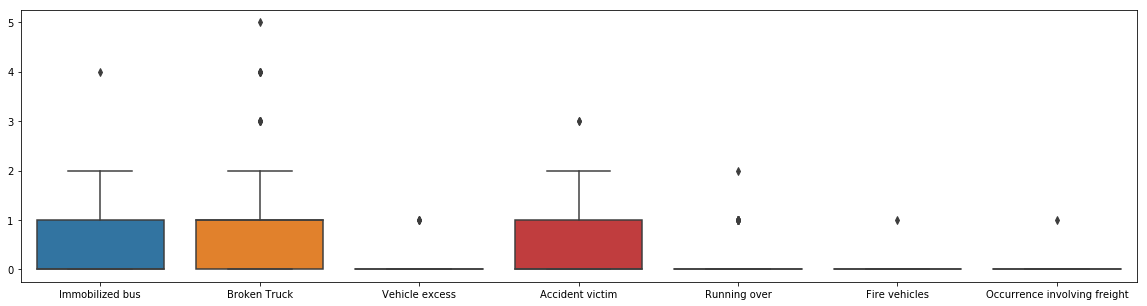

In [3]:
plt.figure(figsize=(20,5))
sbn.boxplot(data = dataset.iloc[:,1:8])

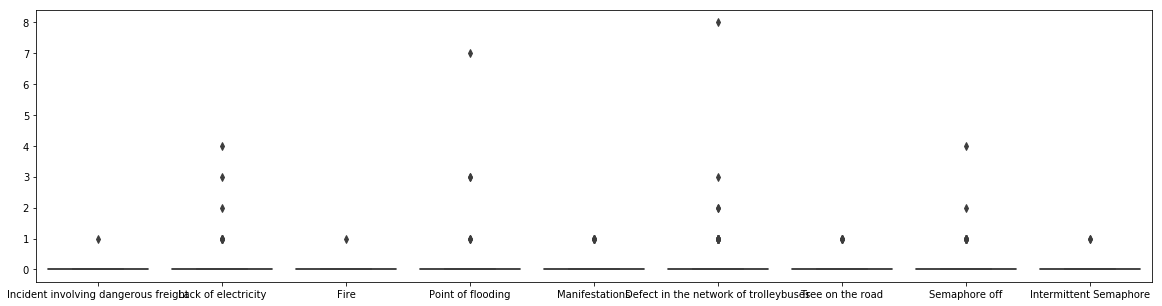

In [4]:
plt.figure(figsize=(20,5))
sbn.boxplot(data = dataset.iloc[:,8:-1])

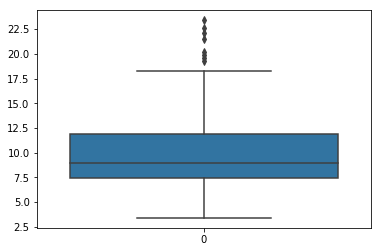

In [5]:
sbn.boxplot(data = dataset.iloc[:,-1])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
Hour (Coded)                             135 non-null int64
Immobilized bus                          135 non-null int64
Broken Truck                             135 non-null int64
Vehicle excess                           135 non-null int64
Accident victim                          135 non-null int64
Running over                             135 non-null int64
Fire vehicles                            135 non-null int64
Occurrence involving freight             135 non-null int64
Incident involving dangerous freight     135 non-null int64
Lack of electricity                      135 non-null int64
Fire                                     135 non-null int64
Point of flooding                        135 non-null int64
Manifestations                           135 non-null int64
Defect in the network of trolleybuses    135 non-null int64
Tree on the road                         135 non-null i

In [7]:
print("Columns number: "+str(len(dataset.columns)))

Columns number: 18


# Visualisation summary
It can be clearly seen that there are 17 integer columns that will be part of X array and 1 column that will be predicted by regressors.

There are no null values in any column. All 135 rows in 18 columns are filled with values.

The main problem of dataset is that it has only 135 rows, so it is very small. The other problem is that values in many columns are very small (more that 75% values are zero).

## Splitting
Because it is data made in time, last 20% of dataset will be test dataset.

In [10]:

# Podzial datasetu na Cel i Dane
X = dataset.iloc[:,  :-1].values
y = dataset.iloc[:, -1].values

In [11]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

In [13]:
pd.DataFrame(y_train).describe()

,0
count,108.000000
mean,9.760185
std,4.424062
min,3.400000
25%,6.875000
50%,8.350000
75%,11.250000
max,23.400000


In [14]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,14.000000,0.333333,0.851852,0.009259,0.379630,0.101852,0.009259,0.009259,0.009259,0.138889,0.009259,0.148148,0.055556,0.129630,0.046296,0.111111,0.018519
std,7.825193,0.655673,1.109136,0.096225,0.693327,0.333204,0.096225,0.096225,0.096225,0.554646,0.096225,0.795017,0.230129,0.434335,0.211106,0.480135,0.135445
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,3.000000,1.000000,4.000000,1.000000


In [15]:
pd.DataFrame(y_train).describe()

,0
count,108.000000
mean,9.760185
std,4.424062
min,3.400000
25%,6.875000
50%,8.350000
75%,11.250000
max,23.400000


In [16]:
from sklearn.preprocessing import StandardScaler
# Skalowanie danych liczbowych aby dane o Dużych wartościach nie zostały uznane za bardziej znaczące dla modelu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,108.000000,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,-4.111937e-18,1.027984e-17,-2.672759e-17,-2.081668e-17,-5.345518e-17,0.000000,-4.882925e-18,-2.312965e-18,-2.312965e-18,-8.223874e-18,-2.055969e-17,3.289550e-17,-2.415763e-17,-5.756712e-17,2.826957e-17,8.223874e-18,-4.625929e-18
std,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00
min,-1.669046e+00,-5.107539e-01,-7.716123e-01,-9.667365e-02,-5.501002e-01,-0.307100,-9.667365e-02,-9.667365e-02,-9.667365e-02,-2.515773e-01,-9.667365e-02,-1.872146e-01,-2.425356e-01,-2.998471e-01,-2.203263e-01,-2.324953e-01,-1.373606e-01
25%,-8.987170e-01,-5.107539e-01,-7.716123e-01,-9.667365e-02,-5.501002e-01,-0.307100,-9.667365e-02,-9.667365e-02,-9.667365e-02,-2.515773e-01,-9.667365e-02,-1.872146e-01,-2.425356e-01,-2.998471e-01,-2.203263e-01,-2.324953e-01,-1.373606e-01
50%,0.000000e+00,-5.107539e-01,1.341934e-01,-9.667365e-02,-5.501002e-01,-0.307100,-9.667365e-02,-9.667365e-02,-9.667365e-02,-2.515773e-01,-9.667365e-02,-1.872146e-01,-2.425356e-01,-2.998471e-01,-2.203263e-01,-2.324953e-01,-1.373606e-01
75%,8.987170e-01,1.021508e+00,1.341934e-01,-9.667365e-02,8.989443e-01,-0.307100,-9.667365e-02,-9.667365e-02,-9.667365e-02,-2.515773e-01,-9.667365e-02,-1.872146e-01,-2.425356e-01,-2.998471e-01,-2.203263e-01,-2.324953e-01,-1.373606e-01
max,1.669046e+00,5.618293e+00,3.757416e+00,1.034408e+01,3.797033e+00,5.723221,1.034408e+01,1.034408e+01,1.034408e+01,6.993849e+00,1.034408e+01,8.658673e+00,4.123106e+00,6.639471e+00,4.538722e+00,8.137335e+00,7.280110e+00


In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
model.intercept_, model.coef_
model.score(X_test, y_test)

0.18017242873993944

In [19]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(15)

,Actual,Predicted
0,3.4,-2.260941
1,5.0,4.655678
2,5.5,5.790659
3,6.4,5.091365
4,8.2,3.552002
5,9.0,4.476158
6,10.1,6.731312
7,10.3,6.642091
8,10.9,7.194735
9,12.3,7.974954


In [20]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

12.47658356705338

In [21]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,10,5), alpha=1e-3, activation = 'relu',solver='sgd',random_state=0)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.02663604481606763

In [22]:
mlp_y_pred = mlp.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': mlp_y_pred.flatten()})
df.head(15)

,Actual,Predicted
0,3.4,9.573039
1,5.0,5.901187
2,5.5,6.076812
3,6.4,6.733119
4,8.2,5.705158
5,9.0,4.499167
6,10.1,5.981439
7,10.3,6.343880
8,10.9,5.780719
9,12.3,6.697502


In [23]:
metrics.mean_squared_error(y_test, mlp_y_pred)

14.813184081311666

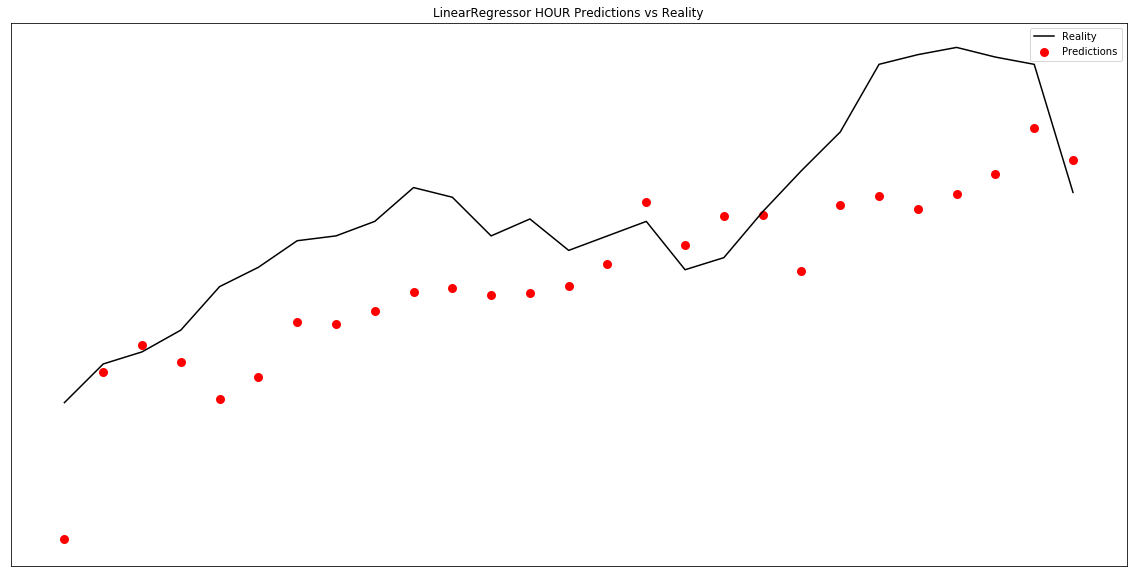

In [24]:
plt.figure(figsize=(20,10))
plt.title("LinearRegressor HOUR Predictions vs Reality")
plt.plot(pd.DataFrame(X_test).iloc[:,:1], y_test,  color='black', label='Reality')
plt.scatter(pd.DataFrame(X_test).iloc[:,:1], y_pred, color='red', linewidth=3, label='Predictions')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

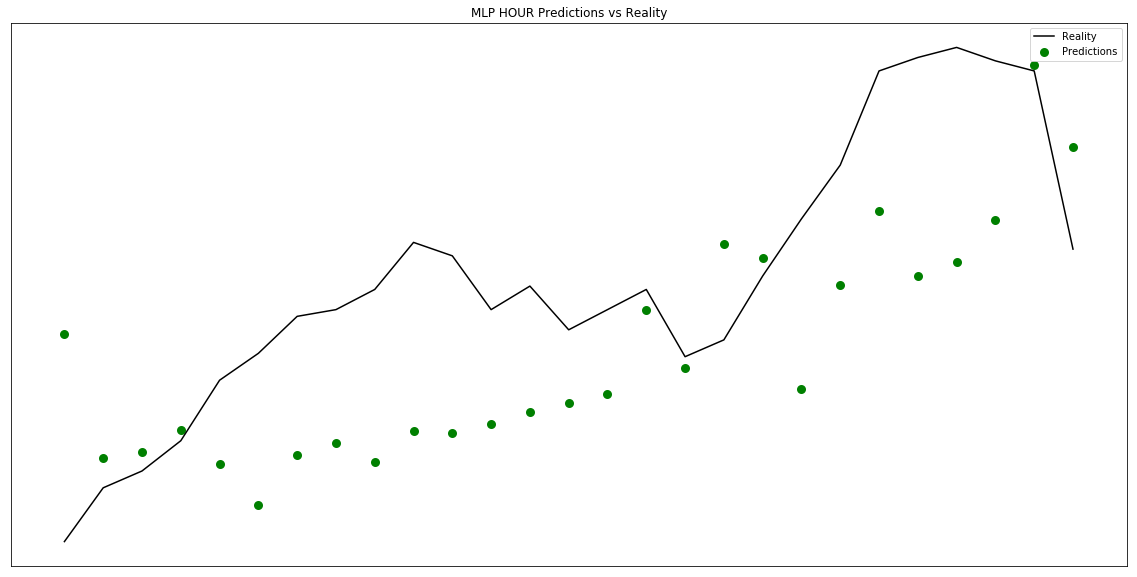

In [25]:
plt.figure(figsize=(20,10))
plt.title("MLP HOUR Predictions vs Reality")
plt.plot(pd.DataFrame(X_test).iloc[:,:1], y_test,  color='black', label='Reality')
plt.scatter(pd.DataFrame(X_test).iloc[:,:1], mlp_y_pred, color='green', linewidth=3, label='Predictions')
plt.legend()
plt.xticks(())
plt.yticks(())


plt.show()

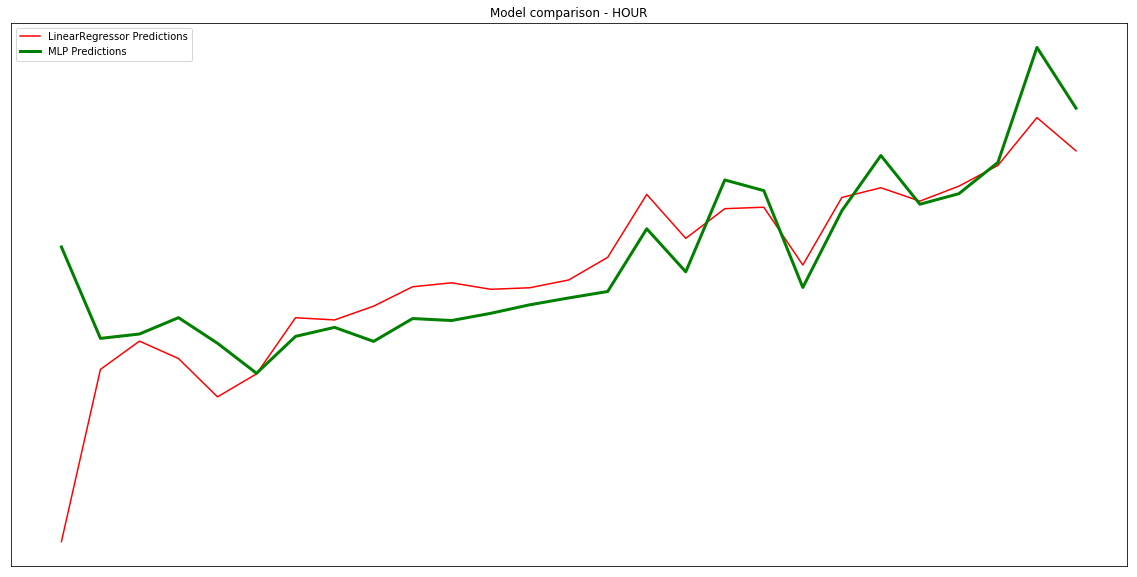

In [26]:
plt.figure(figsize=(20,10))
plt.title("Model comparison - HOUR")
plt.plot(pd.DataFrame(X_test).iloc[:,0], y_pred,  color='red', label='LinearRegressor Predictions')
plt.plot(pd.DataFrame(X_test).iloc[:,0], mlp_y_pred, color='green', linewidth=3, label='MLP Predictions')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()